In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
! wget https://raw.githubusercontent.com/LuisFGarciaM/PPARg-QSAR/main/PPARg_bioactivity_data_3class_pEC50_pubchem_fp.csv

--2022-01-15 00:46:44--  https://raw.githubusercontent.com/LuisFGarciaM/PPARg-QSAR/main/PPARg_bioactivity_data_3class_pEC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6971750 (6.6M) [text/plain]
Saving to: ‘PPARg_bioactivity_data_3class_pEC50_pubchem_fp.csv.1’

PPARg_bioactivity_d 100%[===================>]   6.65M  --.-KB/s    in 0.09s   

2022-01-15 00:46:44 (75.6 MB/s) - ‘PPARg_bioactivity_data_3class_pEC50_pubchem_fp.csv.1’ saved [6971750/6971750]



In [5]:
df = pd.read_csv('PPARg_bioactivity_data_3class_pEC50_pubchem_fp.csv')

In [6]:
X = df.drop('pEC50', axis=1)
Y = df.pEC50

In [7]:
X.shape

(3925, 881)

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(3925, 153)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Comparing Machine Learning Algorithms

In [10]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 52601.01it/s]


In [11]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.81,0.82,0.51,0.16
ExtraTreeRegressor,0.81,0.82,0.51,0.14
ExtraTreesRegressor,0.81,0.82,0.51,5.09
GaussianProcessRegressor,0.81,0.82,0.51,3.93
XGBRegressor,0.78,0.79,0.54,1.93
RandomForestRegressor,0.77,0.78,0.55,3.90
BaggingRegressor,0.75,0.76,0.58,0.56
MLPRegressor,0.74,0.75,0.60,5.68
HistGradientBoostingRegressor,0.65,0.66,0.69,3.95


In [13]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


Data Visualization of Model performance

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

[(0.0, 1.0)]

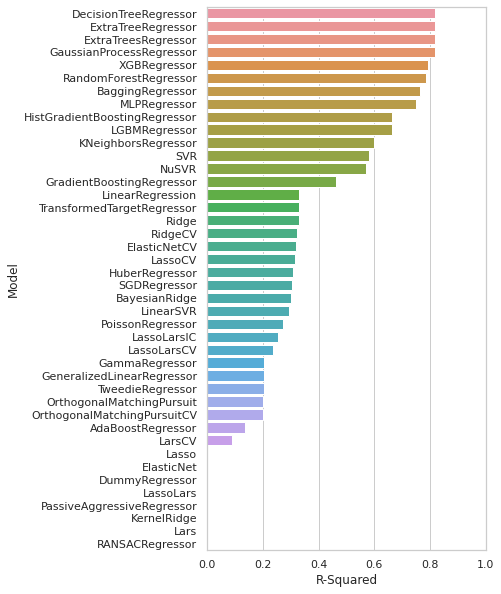

In [16]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

[(0.0, 10.0)]

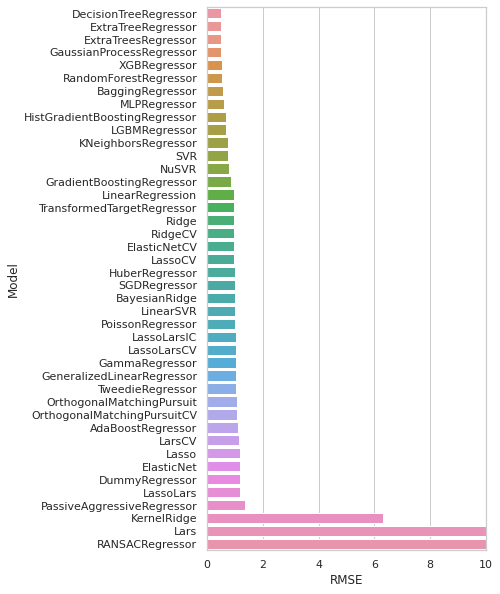

In [18]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

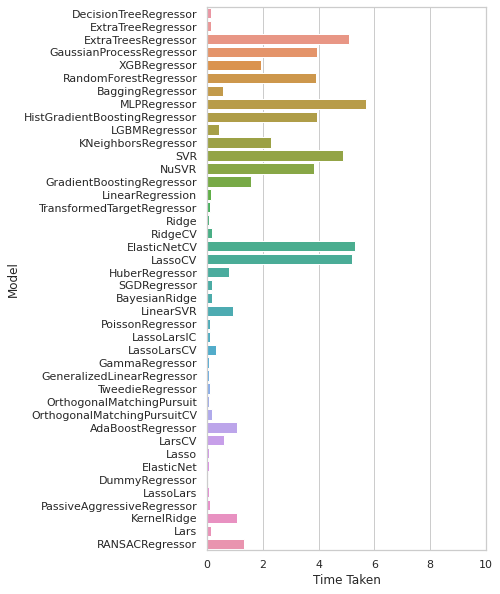

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))